# Image Preprocessing

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory(r"C:\Users\welcome\Downloads\conversation engine for deaf and dumb\Dataset\training_set",target_size=(64,64),
                                          class_mode="categorical",batch_size=30)

Found 15750 images belonging to 9 classes.


In [6]:
x_test=test_datagen.flow_from_directory(r"C:\Users\welcome\Downloads\conversation engine for deaf and dumb\Dataset\test_set",target_size=(64,64),
                                                            class_mode="categorical",batch_size=30)

Found 2250 images belonging to 9 classes.


# Model Building

In [8]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [9]:
model=Sequential()

In [10]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
#No of feature detectors, size of feature detector, image size, activation function

**add the Pooling Layer**

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))


**Adding the flatten Layer**

In [14]:
model.add(Flatten())

**Adding the Dense Layer**

In [16]:
model.add(Dense(200,activation='relu'))


In [17]:
model.add(Dense(200,activation='relu'))

In [18]:
model.add(Dense(9,activation="softmax"))

**Compile the model**

In [20]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [21]:
len(x_train)

525

In [22]:
len(x_test)

75

In [23]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

**Fit and Save the Model**

In [25]:
model.fit(x_train,epochs=9,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/9
525/525 [==============================] - 81s 151ms/step - loss: 0.2760 - accuracy: 0.9070 - val_loss: 0.1664 - val_accuracy: 0.9689
Epoch 2/9
525/525 [==============================] - 77s 146ms/step - loss: 0.0602 - accuracy: 0.9807 - val_loss: 0.2912 - val_accuracy: 0.9742
Epoch 3/9
525/525 [==============================] - 80s 152ms/step - loss: 0.0413 - accuracy: 0.9869 - val_loss: 0.3055 - val_accuracy: 0.9484
Epoch 4/9
525/525 [==============================] - 82s 156ms/step - loss: 0.0268 - accuracy: 0.9910 - val_loss: 0.2799 - val_accuracy: 0.9671
Epoch 5/9
525/525 [==============================] - 67s 128ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0759 - val_accuracy: 0.9844
Epoch 6/9
525/525 [==============================] - 66s 126ms/step - loss: 0.0215 - accuracy: 0.9926 - val_loss: 0.1524 - val_accuracy: 0.9680
Epoch 7/9
525/525 [==============================] - 69s 132ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 0.3126 - val_accuracy:

In [26]:
model.save('signlanguage-new.h5')

# Test The Model

In [28]:
from keras.models import load_model
import numpy as np
import h5py
import cv2



In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [30]:
model = load_model(r'C:\Users\welcome\Downloads\signlanguage-new.h5')

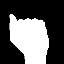

In [37]:
img =image.load_img(r"C:\Users\welcome\Downloads\conversation engine for deaf and dumb\Dataset\test_set\A\25.png",target_size = (64,64))
img


In [38]:
type(img)

PIL.Image.Image

In [39]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [40]:
x.shape

(64, 64, 3)

In [41]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [42]:
pred_prob = model.predict(x)

In [43]:
pred_prob

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
class_name=["A","B","C","D","E","F","G","H","I"]
pred_id = pred_prob.argmax(axis=1)[0]

In [45]:
pred_id

0

In [47]:
print("the alphabet is  ",str(class_name[pred_id]))

the alphabet is   A
